## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [5]:
## Task 1 - Logistic regression

#Task 1.1
#Find Correlation between the feature
corr = data.drop(['target'], axis=1).corr()
corr

,x,y,z,x*x,2*y,2*z+3*x*x,w
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000


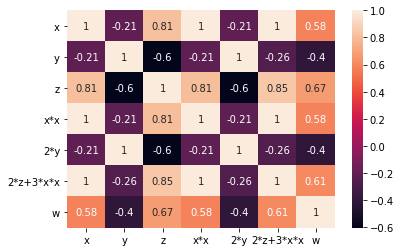

In [6]:
sns.heatmap(corr,annot=True)

<pre>
<font color='Blue'><b>HeatMap Results</b></font>
<strong>X highly correlated with x*x,z,2*z+3*x*x,w	</strong>
<strong>Y highly correlated with y*y	</strong>

In [7]:
#Task 1.2
logistic = LogisticRegression()
alpha_values = np.logspace(-1, 2, 20)
params_logReg = {
   'C':alpha_values

}

gridsearchcv_logistic = GridSearchCV(estimator=logistic,param_grid=params_logReg,cv=3,
                                n_jobs=-1)

In [8]:
gridsearchcv_logistic.fit(X,Y)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([  0.1       ,   0.14384499,   0.20691381,   0.29763514,
         0.42813324,   0.61584821,   0.88586679,   1.27427499,
         1.83298071,   2.6366509 ,   3.79269019,   5.45559478,
         7.8475997 ,  11.28837892,  16.23776739,  23.35721469,
        33.59818286,  48.32930239,  69.51927962, 100.        ])},
      

In [9]:
gridsearchcv_logistic.best_params_

{'C': 0.1}

In [10]:
best_model = LogisticRegression(C=0.1)
best_model.fit(X,Y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
#Task 1.3
best_model_accuracy = best_model.score(X,Y)
coeff  = best_model.coef_
print('Best Accuracy score ', best_model_accuracy)
print('Coefficient value ')

df_coeff =pd.DataFrame(data=coeff,columns=corr.columns).T
df_coeff.rename(columns={0:'Coefficient'},inplace=True)
print(df_coeff)

Best Accuracy score  1.0
Coefficient value 
           Coefficient
x             0.413398
y            -0.515531
z             0.784972
x*x           0.393928
2*y          -0.515531
2*z+3*x*x     0.449310
w             0.346586


In [15]:
#Task 1.4 Modifying original data
e = 10^-2
X_1  = X+e
new_X = pd.DataFrame(data=X_1,columns=corr.columns)
best_model = LogisticRegression(C=0.1)
best_model.fit(X_1,Y)

best_model_accuracy_edited = best_model.score(X_1,Y)
coeff_edited  = best_model.coef_
print('Best Accuracy score ', best_model_accuracy_edited)
print('Coefficient value ')

df_coeff =pd.DataFrame(data=coeff,columns=corr.columns).T
df_coeff.rename(columns={0:'Coefficient'},inplace=True)
print(df_coeff)

Best Accuracy score  1.0
Coefficient value 
           Coefficient
x             0.413398
y            -0.515531
z             0.784972
x*x           0.393928
2*y          -0.515531
2*z+3*x*x     0.449310
w             0.346586


In [17]:
new_X.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w
0,-12.581066,-11.158163,-13.012978,-12.604025,-11.158163,-12.665927,-12.536277
1,-12.894309,-12.207835,-13.012978,-12.883052,-12.207835,-12.917054,-12.522364
2,-13.207552,-11.787966,-13.082312,-13.150918,-11.787966,-13.166507,-11.794262
3,-13.364174,-11.997901,-12.943643,-13.280666,-11.997901,-13.266540,-12.665720
4,-12.737687,-10.948228,-13.012978,-12.744934,-10.948228,-12.792746,-12.735054


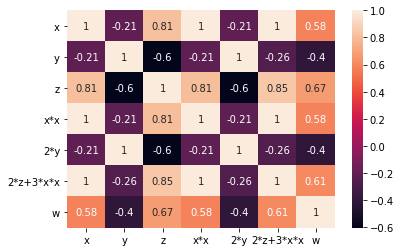

In [19]:
sns.heatmap(new_X.corr(),annot=True)

In [20]:
#Task 1.5 
#a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
diff_bw_Acc_EditedAcc  = best_model_accuracy - best_model_accuracy_edited
coeff_diff= abs(coeff  - coeff_edited)

print('difference between best_model_accuracy_edited and best_model_accuracy',diff_bw_Acc_EditedAcc)
print('Absolute change between each value of W and W ==> |(W-W_edited)| is ',coeff_diff)

difference between best_model_accuracy_edited and best_model_accuracy 0.0
Absolute change between each value of W and W ==> |(W-W_edited)| is  [[1.79151290e-07 1.56177357e-06 2.07320916e-06 6.41658346e-07
  1.56177357e-06 1.33175770e-06 2.55010118e-06]]


In [21]:
coeff_diff

array([[1.79151290e-07, 1.56177357e-06, 2.07320916e-06, 6.41658346e-07,
        1.56177357e-06, 1.33175770e-06, 2.55010118e-06]])

In [22]:
df_coeff_higherchange =pd.DataFrame(data=coeff_diff,columns=corr.columns).T
df_coeff_higherchange.rename(columns={0:'Coefficient_diff'},inplace=True)
print(df_coeff_higherchange)

           Coefficient_diff
x              1.791513e-07
y              1.561774e-06
z              2.073209e-06
x*x            6.416583e-07
2*y            1.561774e-06
2*z+3*x*x      1.331758e-06
w              2.550101e-06


In [31]:
df_coeff_higherchange.sort_values(by='Coefficient_diff',axis=0,ascending=False)[:5]

,Coefficient_diff
w,0.000003
z,0.000002
y,0.000002
2*y,0.000002
2*z+3*x*x,0.000001


### Adding noise , not impacted the weight the much.

### Task 2. SVM

In [32]:
#Task 2.2
SVM = SVC(kernel='linear')
alpha_values = np.logspace(-1, 2, 20)
params_logReg = {
   'C':alpha_values

}

gridsearchcv_SVM = GridSearchCV(estimator=SVM,param_grid=params_logReg,cv=3,
                                n_jobs=-1)

gridsearchcv_SVM.fit(X,Y)

gridsearchcv_SVM.best_params_

best_model = SVC(C=0.1,kernel='linear')
best_model.fit(X,Y)

#Task 2.3
best_model_accuracy = best_model.score(X,Y)
coeff  = best_model.coef_
print('Best Accuracy score ', best_model_accuracy)
print('Coefficient value ')

df_coeff =pd.DataFrame(data=coeff,columns=corr.columns).T
df_coeff.rename(columns={0:'Coefficient'},inplace=True)
print(df_coeff)

#Task 2.4 Modifying original data
e = 10^-2
X_1  = X+e
best_model = SVC(C=0.1,kernel='linear')
best_model.fit(X_1,Y)

best_model_accuracy_edited = best_model.score(X_1,Y)
coeff_edited  = best_model.coef_
print('Best Accuracy score ', best_model_accuracy_edited)
print('Coefficient value ')

df_coeff =pd.DataFrame(data=coeff,columns=corr.columns).T
df_coeff.rename(columns={0:'Coefficient'},inplace=True)
print(df_coeff)

#Task 2.5 
#a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
diff_bw_Acc_EditedAcc  = best_model_accuracy - best_model_accuracy_edited
coeff_diff= abs(coeff  - coeff_edited)

print('difference between best_model_accuracy_edited and best_model_accuracy',diff_bw_Acc_EditedAcc)
print('Absolute change between each value of W and W ==> |(W-W_edited)| is ',coeff_diff)

coeff_diff

df_coeff_higherchange =pd.DataFrame(data=coeff_diff,columns=corr.columns).T
df_coeff_higherchange.rename(columns={0:'Coefficient_diff'},inplace=True)
print(df_coeff_higherchange)

df_coeff_higherchange.sort_values(by='Coefficient_diff',axis=0,ascending=False)[:5]

Best Accuracy score  1.0
Coefficient value 
           Coefficient
x             0.206086
y            -0.295112
z             0.667505
x*x           0.186201
2*y          -0.295112
2*z+3*x*x     0.248172
w             0.096677
Best Accuracy score  1.0
Coefficient value 
           Coefficient
x             0.206086
y            -0.295112
z             0.667505
x*x           0.186201
2*y          -0.295112
2*z+3*x*x     0.248172
w             0.096677
difference between best_model_accuracy_edited and best_model_accuracy 0.0
Absolute change between each value of W and W ==> |(W-W_edited)| is  [[2.60790197e-05 6.46749470e-04 3.12952705e-04 1.87272274e-05
  6.46749470e-04 2.09287813e-05 5.57059935e-04]]
           Coefficient_diff
x                  0.000026
y                  0.000647
z                  0.000313
x*x                0.000019
2*y                0.000647
2*z+3*x*x          0.000021
w                  0.000557


,Coefficient_diff
y,0.000647
2*y,0.000647
w,0.000557
z,0.000313
x,0.000026


### Compare to logistic adding noise which slightly weight is changed , but acuraccy doesn't impacted.